C:\Users\Lalit\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 31s 32ms/step - accuracy: 0.7233 - loss: 0.8282 - val_accuracy: 0.9763 - val_loss: 0.0769
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.9555 - loss: 0.1527 - val_accuracy: 0.9842 - val_loss: 0.0523
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.9705 - loss: 0.1060 - val_accuracy: 0.9849 - val_loss: 0.0481
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 33ms/step - accuracy: 0.9767 - loss: 0.0798 - val_accuracy: 0.9876 - val_loss: 0.0414
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.9805 - loss: 0.0675 - val_accuracy: 0.9893 - val_loss: 0.0361
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.9837 - loss: 0.0593 - val_accuracy: 0.9890 - val_loss: 0.0390
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.9847 - loss: 0.0510 - val_accuracy: 0.9904 - val_loss: 0.0346
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.9860 - loss: 0.0472 - 

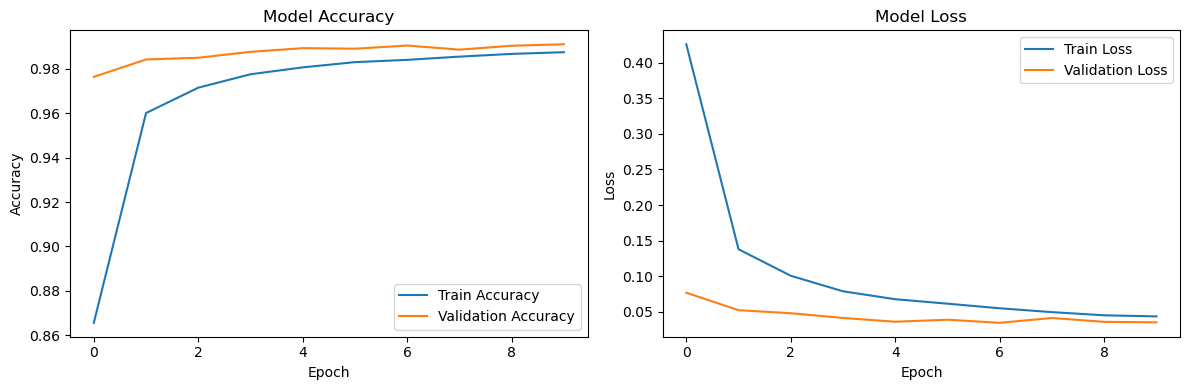

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data to include a channel dimension for grayscale (28, 28, 1)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Normalize the data to be in the range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert the labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the CNN model
model = models.Sequential()

# First Convolutional Layer (Conv2D) + MaxPooling + Dropout
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  # Adding Dropout layer with 25% rate

# Second Convolutional Layer (Conv2D) + MaxPooling + Dropout
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  # Adding Dropout layer with 25% rate

# Third Convolutional Layer (Conv2D)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the data for fully connected layers
model.add(layers.Flatten())

# Fully Connected Layer (Dense) + Dropout
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))  # Adding Dropout layer with 50% rate

# Output layer for classification (10 classes)
model.add(layers.Dense(10, activation='softmax'))

# Compile the model with optimizer, loss function, and accuracy metric
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary to show the architecture and parameters
model.summary()

# Train the CNN model on MNIST data
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"Test accuracy: {test_acc}")

# Plotting accuracy and loss
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()
